In [2]:
# for array computations and laoding data
import numpy as np

# for building linear regression models and preparing data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# for data visualization
import matplotlib.pyplot as plt

# for building and training neural networks
import tensorflow as tf

# reduce display precision on numpy arrays
np.set_printoptions(precision=2)

# supress warnings
tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(0)


2025-04-14 18:29:14.754298: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-14 18:29:15.311373: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-14 18:29:16.079881: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Regression

I will build a model for a regression problem. Tha dataset contains 50 examples of an input feature `X` and its corresponding target `y`.

In [3]:
# load the data
data = np.loadtxt('./data/data_w3_ex1.csv', delimiter=',')

# split the inputs and outputs into separate arrays
x = data[:,0]
y = data[:,1]

# convert 1-D arrays into 2-D because the commands later will requiere it
x = np.expand_dims(x, axis=1)
y = np.expand_dims(y, axis=1)

#np. expand dims: Expand the shape of the array.
# Insert a new axis that will appear at the axis position in the expanded array shape

print(f" The shape of the inputs x is : {x.shape}")
print(f" The shape of the inputs y is : {y.shape}")

 The shape of the inputs x is : (50, 1)
 The shape of the inputs y is : (50, 1)


# Visualization

In [4]:
def plot_data(x,y, title):
    plt.rcParams["figure.figsize"] = (12,8)
    plt.rcParams["lines.markersize"] = 12
    plt.scatter(x,y, marker='x', c='r')
    plt.title(title)
    plt.xlabel("x");
    plt.ylabel("y");
    plt.show()

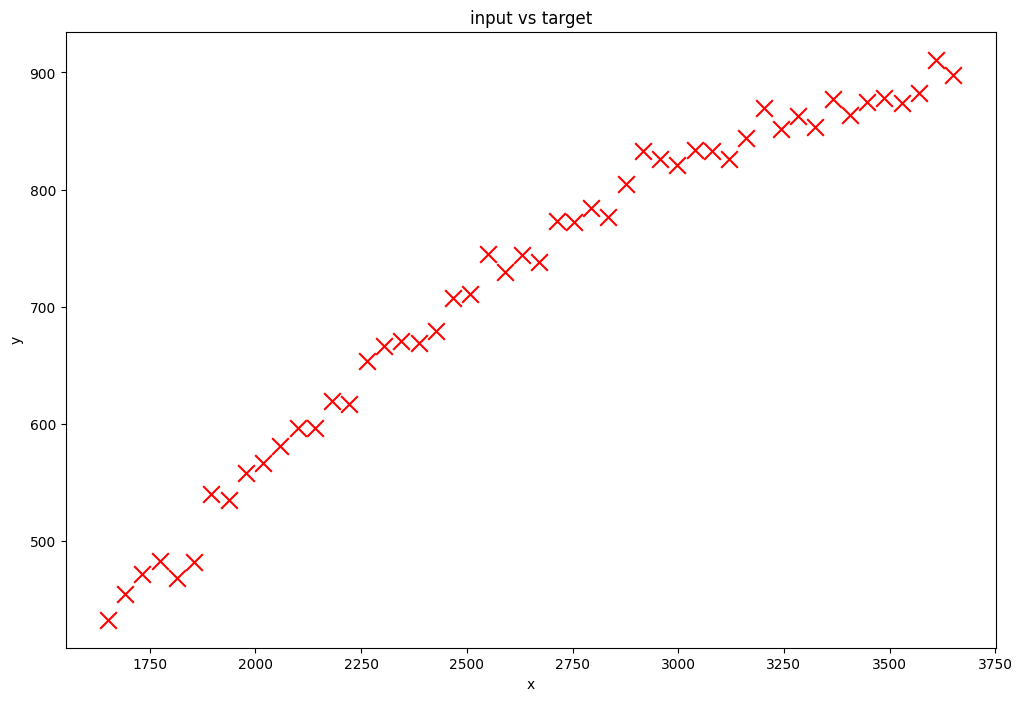

In [5]:
plot_data(x=x,y=y, title="input vs target")

# Split the data (Training, Cross-Validation, Test)

In [6]:
# Get 60 % of the dataset as the training set. Put the remaining 40% in temporary variables x_, y_.
x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del x_, y_

print(f"The shape of the training set (input) is: {x_train.shape}")
print(f"The shape of the training set (target) is: {y_train.shape}\n")
print(f"The shape of the cross validation set (input) is: {x_cv.shape}")
print(f"The shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"The shape of the test set (input) is: {x_test.shape}")
print(f"The shape of the test set (target) is: {y_test.shape}")



The shape of the training set (input) is: (30, 1)
The shape of the training set (target) is: (30, 1)

The shape of the cross validation set (input) is: (10, 1)
The shape of the cross validation set (target) is: (10, 1)

The shape of the test set (input) is: (10, 1)
The shape of the test set (target) is: (10, 1)


### Visualizing how the data was selected

In [7]:
def plot_data_explicit(x_train, y_train, x_cv, y_cv, x_test, y_test, title):
    plt.rcParams["figure.figsize"] = (12,8)
    plt.rcParams["lines.markersize"] = 12
    plt.scatter(x_train, y_train, marker='X', c='g', label='train')
    plt.scatter(x_cv, y_cv, marker='o', c='b', label='cv')
    plt.scatter(x_test, y_test, marker='v', c='m', label='test')
    plt.title(title)
    plt.xlabel("x");
    plt.ylabel("y");
    plt.legend(loc='upper left')
    plt.show()


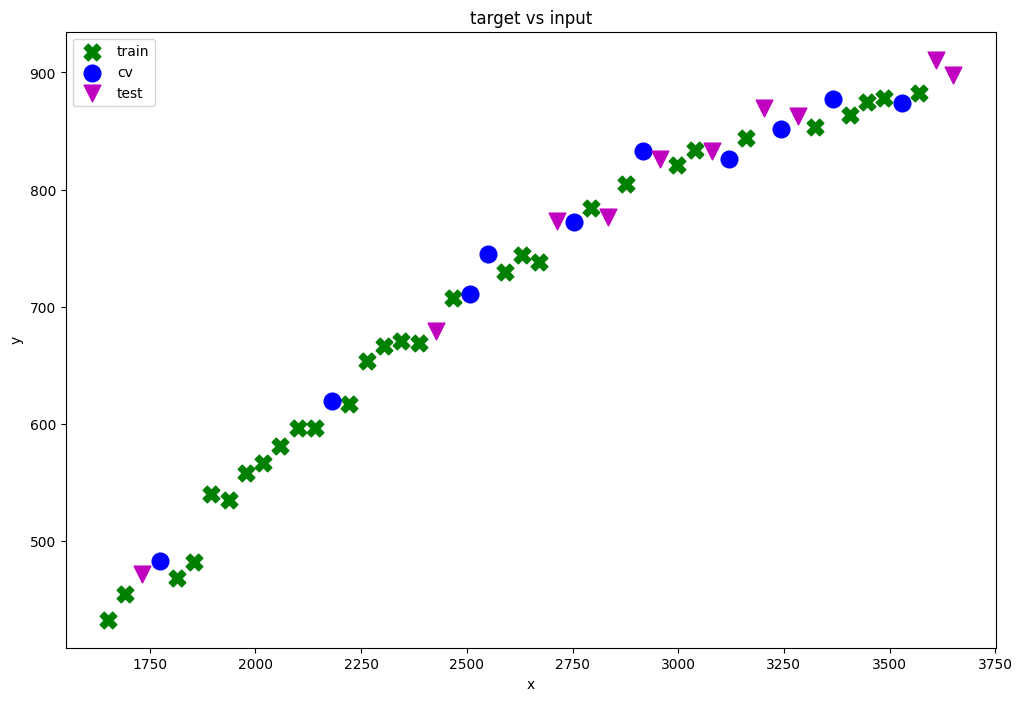

In [8]:
plot_data_explicit(x_train, y_train, x_cv, y_cv, x_test, y_test, title="target vs input")

# Fit a linear model

## Feature Scaling

`StandardScaler` class from scikit-learn computes a z-score:

$$z = \frac{z - \mu}{\sigma}$$

With this class, I will scaling the inputs

In [9]:
#Initialize the class
scaler_linear = StandardScaler()

#Compute the mean and standard deviation of the traininig set, then transform it
X_train_scaled = scaler_linear.fit_transform(x_train)

print(f"Computed mean of the training set: {scaler_linear.mean_.squeeze():.2f}")
print(f"Computed standard deviation of the training set: {scaler_linear.scale_.squeeze():.2f}")

Computed mean of the training set: 2504.06
Computed standard deviation of the training set: 574.85


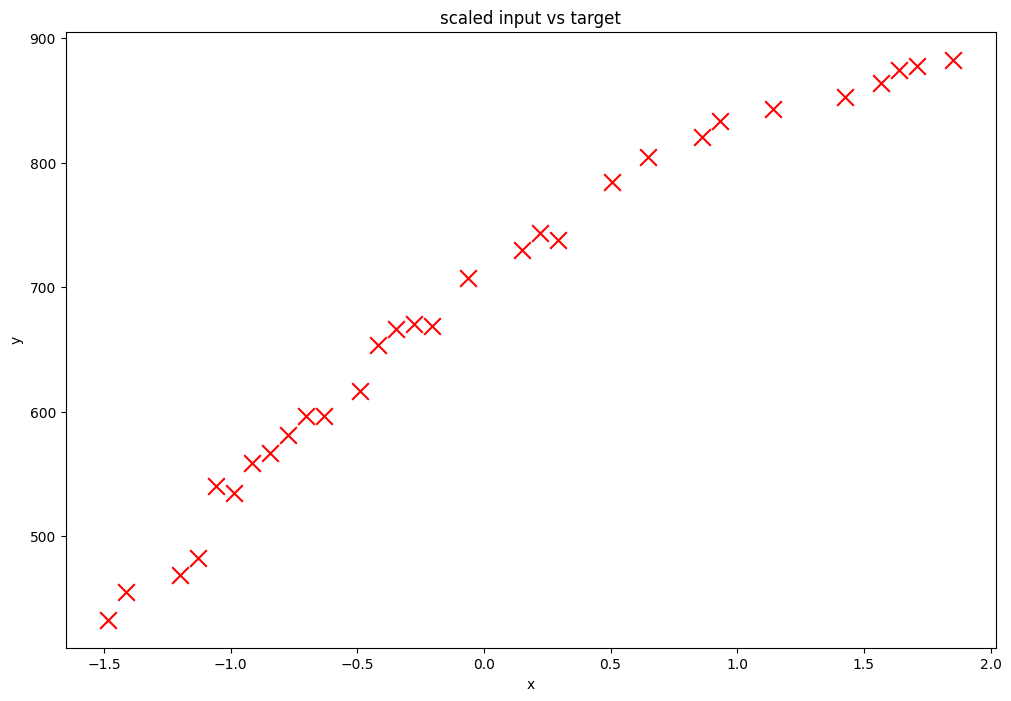

In [10]:

#Plot the results
plot_data(x=X_train_scaled,y=y_train, title="scaled input vs target")


# Train the model

In [11]:
# Initialize the class
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

# Evaluate the model

I will measure the error for the training and cross validation sets. For the training error, I will calculate the Mean Squared Error (MSE).

In [12]:
# Feed the scaled training set and get predictions
yhat = linear_model.predict(X_train_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"Training MSE (using sklearn function): {mean_squared_error(y_train, yhat) / 2}")

# Using loop implementation (to compare the results)

total_squared_error = 0

for i in range(len(yhat)):
    squared_error_i = (yhat[i] - y_train[i])**2
    total_squared_error += squared_error_i

mse = total_squared_error / (2 * len(yhat))

print(f"Training MSE (for-loop implementation): {mse.squeeze()}")

Training MSE (using sklearn function): 406.19374192533127
Training MSE (for-loop implementation): 406.19374192533127


Now, I can compute the MSE for the cross validation (using the same equation as before).

As with the training set, I should scale the cross validation set. An important thing to note when using the z-score is you have to use the mean and standard deviation of the **training set** when scaling the cross validation set. This is to ensure that your input features are transformed as expected by the model.

As before, I will scale the cross validation set below by using the same `StandardScaler`, but only calling its `transform()` method instead of `fit_transform()`.

In [13]:
# Scale the cross validation set using the mean and standard deviation of the training set
X_cv_scaled = scaler_linear.transform(x_cv)

print(f"Mean used to scale the CV set: {scaler_linear.mean_.squeeze():.2f}")
print(f"Standard deviation used to scale the CV set: {scaler_linear.scale_.squeeze():.2f}")

# Feed the scaled cross validation set
yhat = linear_model.predict(X_cv_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Mean used to scale the CV set: 2504.06
Standard deviation used to scale the CV set: 574.85
Cross validation MSE: 551.7789026952216


# Adding tpolynomial features

### Creating additional features

 I will generate the polynomial features from the training set. The `PolinomialFeatures` class will create a new input feature which has the squared values of the input (i.e. degree = 2).

In [ ]:
# Instantiate the class to make polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)

# Compute the number of features and transform the training set
x_train_mapped = poly.fit_transform(x_train)

# Preview the first 5 elements of the new training set. Left column is 'x' and right column is 'x^2'
print(x_train_mapped[:5])

[[3.32e+03 1.11e+07]
 [2.34e+03 5.50e+06]
 [3.49e+03 1.22e+07]
 [2.63e+03 6.92e+06]
 [2.59e+03 6.71e+06]]


Scaling the inputs as before to narrow down the range of values:

In [15]:
#  Instantiate the class
scaler_poly = StandardScaler()

# Compute the mean and standard deviation of the training set, then transform it
x_train_mapped_scaled = scaler_poly.fit_transform(x_train_mapped)

# Preview the first 5 elements
print(x_train_mapped_scaled[:5])

[[ 1.43  1.47]
 [-0.28 -0.36]
 [ 1.71  1.84]
 [ 0.22  0.11]
 [ 0.15  0.04]]
